In [144]:
from IPython.display import Latex
from IPython.display import Image
from IPython.core.display import HTML 

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt, pi
from labs import *

**Цель работы:** исследовать вынужденную прецессию гироскопа; установить зависимость скорости вынужденной прецессии от величины момента сил, действующих на ось гироскопа; определить скорость вращения ротора гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии.

**В работе используются:** гироскоп в кардановом подвесе, секундомер, набор грузов, от- дельный ротор гироскопа, цилиндр известной массы, крутильный маятник, штангенциркуль, линейка.

**Для начала исмерим момент инерции ротора**

Момент инерции $I_{0}$ можно определить по крутильным колебаниям точной копии, подвеши- ваемой вдоль оси симметрии к жесткой проволоке с модулем кручения $f$:
$$T = 2 \pi \sqrt{\frac{I_{0}}{f}}$$
Чтобы исключить f подвешивают цилиндр правильной формы с моментом инерции $I_{ц}$, таким образом имеем:
$$I_{0} = I_{ц} \frac{T_{0}^2}{T_{ц}^2}$$

In [146]:
I0 = Value(7.7 * 10 ** (-4), 0.000032)

Введем физические параметры системы и нашего мира.

In [147]:
g = Value(9.81, 0.01)
a = Value(0.119, 0.003)
m = Value(1.16168, 0.01)
r = Value(0.082, 0.002) / 2

Проведем измерения времени вращенияя с разными массами и запишем результаты в csv файл. Для постороения графика $\omega$ от $M$ посчитаем их по формулам:
$$\omega = \frac{2\pi}{\frac{T}{N}}$$
$$M = mg * a$$

In [148]:
p = pd.read_csv("data.csv")
p["m"] = p["m"].agg(const_err(0.001))
p["t"] = p["t"].agg(const_err(0.5))
p["M"] = p.m * a * g
p["tau"] = p["t"] / p["n"]
p["omega"] = 2 * pi / p["tau"]
p

,t,m,n,M,tau,omega
0,(117.83±0.5),(0.3411±0.001),4,(0.398197±0.010114),(29.4575±0.125),(0.213297±0.000905)
1,(149.25±0.5),(0.2725±0.001),4,(0.318114±0.008111),(37.3125±0.125),(0.168394±0.000564)
2,(168.99±0.5),(0.1785±0.001),3,(0.208379±0.005386),(56.33±0.166667),(0.111542±0.00033)
3,(183.95±0.5),(0.2192±0.001),4,(0.255892±0.006561),(45.9875±0.125),(0.136628±0.000371)
4,(213.85±0.5),(0.1412±0.001),3,(0.164835±0.00432),(71.283333±0.166667),(0.088144±0.000206)
5,(260.24±0.5),(0.1164±0.001),3,(0.135884±0.003622),(86.746667±0.166667),(0.072431±0.000139)
6,(327.47±0.5),(0.0928±0.001),3,(0.108334±0.002972),(109.156667±0.166667),(0.057561±0.000088)
7,(245.45±0.5),(0.0759±0.001),2,(0.088605±0.002522),(122.725±0.25),(0.051197±0.000104)
8,(358.37±0.5),(0.0566±0.001),2,(0.066074±0.002035),(179.185±0.25),(0.035065±0.000049)


Ну а теперь построим график и апроксимируем зависимость

In [149]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= p["M"], ydata=p["omega"], )
k = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))
k, b

((0.530026±0.004698), (0.001081±0.001037))

Вытащим из коэффициента наклона графика частоту вращения ротора:
$$ \omega_{р} = k * I_{0} * 2\pi$$
В оборотах в минуту это вот столько:

In [150]:
omega0 = 1 / (k * I0)
omega0

(2450.258526±104.119599)

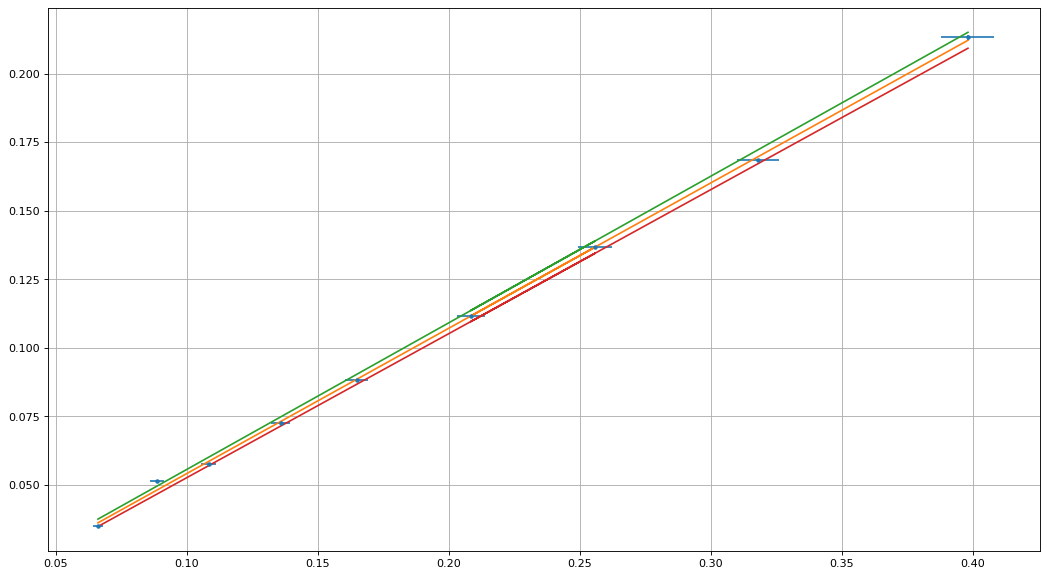

In [151]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=p["M"].agg(get_var), y=p["omega"].agg(get_var),
                xerr=p["M"].agg(get_err), yerr=p["omega"].agg(get_err), fmt='.')
plt.grid(True)
plt.plot(p["M"], line(p["M"], params[0], params[1]), label="Истиная зависимость")
plt.plot(p["M"], line(p["M"], params[0] + k.err, params[1] + b.err))
plt.plot(p["M"], line(p["M"], params[0] - k.err, params[1] - b.err))

Посчитаем момент сил опускания рычага:
$$M_{тр} = I_{0} * \omega_{0} * \omega_{р}

In [152]:
omega0

(2450.258526±104.119599)

In [153]:
I0 * omega0 * Value(0.0006)

(0.001132±0.000067)